# Data Extraction

In [1]:
import pandas as pd
import numpy as np 
import re

In [2]:
## read csv file
df = pd.read_csv('loss-circulation.csv'\
                 , sep=','\
                 , encoding='utf-8'
                 )
df

,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo
0,09/01/2014,C2,Drop top plug. Cmt unit displace with 20 bbls ...
1,09/01/2014,C2,Drop bottom plug. Mix and pump 28 m3 of 1.90 S...
2,09/01/2014,C2,Drop top plug. Cement unit displace cement wit...
3,09/01/2014,C2,Rig pump 1.59 m3 of base oil ahead and 1.78 SG...
4,09/01/2014,F1,"Cont drilling 6-1/8"" hole from 3121 m to 3130 ..."
...,...,...,...
6301,NaN,NaN,NaN
6302,NaN,NaN,NaN
6303,NaN,NaN,NaN
6304,NaN,NaN,NaN


In [3]:
df.shape

(6306, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6306 entries, 0 to 6305
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DM_EVENT.date_ops_start    1499 non-null   object
 1   DM_ACTIVITY.activity_code  1499 non-null   object
 2   DM_ACTIVITY.activity_memo  1499 non-null   object
dtypes: object(3)
memory usage: 147.9+ KB


In [5]:
df_prep = df[df['DM_ACTIVITY.activity_memo'].notna()]
df_prep.head()

,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo
0,09/01/2014,C2,Drop top plug. Cmt unit displace with 20 bbls ...
1,09/01/2014,C2,Drop bottom plug. Mix and pump 28 m3 of 1.90 S...
2,09/01/2014,C2,Drop top plug. Cement unit displace cement wit...
3,09/01/2014,C2,Rig pump 1.59 m3 of base oil ahead and 1.78 SG...
4,09/01/2014,F1,"Cont drilling 6-1/8"" hole from 3121 m to 3130 ..."


In [6]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 0 to 1498
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DM_EVENT.date_ops_start    1499 non-null   object
 1   DM_ACTIVITY.activity_code  1499 non-null   object
 2   DM_ACTIVITY.activity_memo  1499 non-null   object
dtypes: object(3)
memory usage: 46.8+ KB


In [7]:
df_prep.describe()

,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo
count,1499,1499,1499
unique,51,46,1494
top,06/06/2014,F1,Install circulating head and hose. Circulate (...
freq,97,267,2


In [8]:
keyword = "[Ll][Oo][Ss][SsEe]+"
unit = "[Ll][Oo][Ss][SsEe]+ [.\d]+ (m3)"

def contain_word(w):
#     print(str(w))
    x = re.search(keyword, str(w))
    if x:
        m = re.search(unit, str(w))
        if m:
            return float(re.search("[.\d]+", m.group()).group())
        else:
            return 0
    else:
        return 0

In [9]:
df_prep['LOSS_CIRCULATION'] = df_prep['DM_ACTIVITY.activity_memo'].apply(lambda x: contain_word(x))

<ipython-input-9-906227451873>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['LOSS_CIRCULATION'] = df_prep['DM_ACTIVITY.activity_memo'].apply(lambda x: contain_word(x))


In [10]:
df_prep

,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo,LOSS_CIRCULATION
0,09/01/2014,C2,Drop top plug. Cmt unit displace with 20 bbls ...,0.00
1,09/01/2014,C2,Drop bottom plug. Mix and pump 28 m3 of 1.90 S...,6.20
2,09/01/2014,C2,Drop top plug. Cement unit displace cement wit...,15.26
3,09/01/2014,C2,Rig pump 1.59 m3 of base oil ahead and 1.78 SG...,5.00
4,09/01/2014,F1,"Cont drilling 6-1/8"" hole from 3121 m to 3130 ...",0.00
...,...,...,...,...
1494,31/07/2014,P4F,M/U circulating swedge and surface line. Confi...,0.00
1495,31/07/2014,P4F,"Continue RIH 2-7/8"" completion with 2-7/8"" 6.4...",0.00
1496,31/07/2014,P4F,"Continue RIH with 2-7/8"" completion 6.4# L80 C...",0.00
1497,31/07/2014,F1,"Drill 6-1/8"" hole (AGS/MWD/GrRes-NeuDens) from...",0.00


In [11]:
df_prep[df_prep['LOSS_CIRCULATION']==0].count()

DM_EVENT.date_ops_start      1347
DM_ACTIVITY.activity_code    1347
DM_ACTIVITY.activity_memo    1347
LOSS_CIRCULATION             1347
dtype: int64

In [12]:
df_prep[df_prep['LOSS_CIRCULATION']!=0].count()

DM_EVENT.date_ops_start      152
DM_ACTIVITY.activity_code    152
DM_ACTIVITY.activity_memo    152
LOSS_CIRCULATION             152
dtype: int64

In [13]:
## export to csv
df_prep.to_csv('loss-circulation-transformed.csv')

# Data Profiling

In [14]:
# Average of loss circulation
avg_loss_cir = df_prep['LOSS_CIRCULATION'].sum()/df_prep['LOSS_CIRCULATION'].count()
avg_loss_cir

1.0341407605070045

In [15]:
# Variance of loss circulation
def cal_var(loss_cir):
    sum_sq_dev = 0
    for i in loss_cir.tolist():
        sum_sq_dev += (i-avg_loss_cir)**2
        
    return sum_sq_dev/df_prep['LOSS_CIRCULATION'].count()


print('Variance of loss circulation: ', cal_var(df_prep['LOSS_CIRCULATION']))

Variance of loss circulation:  39.63579473468824


In [16]:
# Maximum of loss circulation
print('Maximum of loss circulation:\n', df_prep[df_prep['LOSS_CIRCULATION']>0].max())

Maximum of loss circulation:
 DM_EVENT.date_ops_start                                             30/06/2014
DM_ACTIVITY.activity_code                                                  P4F
DM_ACTIVITY.activity_memo    While clean out rat hole to 2146.5 m with 1800...
LOSS_CIRCULATION                                                         102.6
dtype: object


In [17]:
# Minimum of loss circulation
print('Minimum of loss circulation:\n', df_prep[df_prep['LOSS_CIRCULATION']>0].min())

Minimum of loss circulation:
 DM_EVENT.date_ops_start                                             01/07/2014
DM_ACTIVITY.activity_code                                                   C1
DM_ACTIVITY.activity_memo    At 2167 m, observe tight spot. Attempt to pass...
LOSS_CIRCULATION                                                          0.16
dtype: object


In [18]:
# Missing percentage of loss circulation
miss_loss_cir = (len(df_prep[df_prep['LOSS_CIRCULATION']==0])/df_prep['LOSS_CIRCULATION'].count())
print('Missing percentage of loss circulation: ', miss_loss_cir*100, '%')

Missing percentage of loss circulation:  89.85990660440294 %


In [19]:
df_prep[df_prep['LOSS_CIRCULATION']!=0].describe()

,LOSS_CIRCULATION
count,152.000000
mean,10.198533
std,17.302839
min,0.160000
25%,1.597500
50%,3.600000
75%,10.025000
max,102.600000



# Viz

In [20]:
## get month and year (mm/yyyy) to DM_EVENT.date_ops_dt

df_prep['DM_EVENT.date_ops_dt'] = df_prep['DM_EVENT.date_ops_start'].str[3:]
df_prep.head()

<ipython-input-20-edbaa0e250e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['DM_EVENT.date_ops_dt'] = df_prep['DM_EVENT.date_ops_start'].str[3:]


,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo,LOSS_CIRCULATION,DM_EVENT.date_ops_dt
0,09/01/2014,C2,Drop top plug. Cmt unit displace with 20 bbls ...,0.00,01/2014
1,09/01/2014,C2,Drop bottom plug. Mix and pump 28 m3 of 1.90 S...,6.20,01/2014
2,09/01/2014,C2,Drop top plug. Cement unit displace cement wit...,15.26,01/2014
3,09/01/2014,C2,Rig pump 1.59 m3 of base oil ahead and 1.78 SG...,5.00,01/2014
4,09/01/2014,F1,"Cont drilling 6-1/8"" hole from 3121 m to 3130 ...",0.00,01/2014


In [21]:
## Calculate the LOSS_CIRCULATION of the DM_ACTIVITY.activity_code for each months

df_viz = df_prep[df_prep['LOSS_CIRCULATION']>0]\
                .groupby(['DM_EVENT.date_ops_dt','DM_ACTIVITY.activity_code'])\
                ['LOSS_CIRCULATION'].sum().reset_index()
df_viz

,DM_EVENT.date_ops_dt,DM_ACTIVITY.activity_code,LOSS_CIRCULATION
0,01/2014,C1,123.300
1,01/2014,C1A,43.200
2,01/2014,C2,279.770
3,01/2014,C3,3.820
4,01/2014,CN2,50.000
5,01/2014,CN7,0.400
6,01/2014,F2A,2.000
7,01/2014,FN1C,22.000
8,01/2014,P4F,6.400
9,02/2014,C1,38.840


In [22]:
## get Quartile 3 of LOSS_CIRCULATION
## Value greater than Q3 of LOSS_CIRCULATION, it happens often

q3_loss_cir = np.quantile(df_prep[df_prep['LOSS_CIRCULATION']>0]['LOSS_CIRCULATION'], .75)
q3_loss_cir

10.025

In [23]:
## filter LOST CIRCULATION, which is greater than Q3

df_viz_q3 = df_viz[df_viz['LOSS_CIRCULATION'] >= q3_loss_cir].reset_index()
df_viz_q3 = df_viz_q3.drop(columns='index')
df_viz_q3

,DM_EVENT.date_ops_dt,DM_ACTIVITY.activity_code,LOSS_CIRCULATION
0,01/2014,C1,123.30
1,01/2014,C1A,43.20
2,01/2014,C2,279.77
3,01/2014,CN2,50.00
4,01/2014,FN1C,22.00
5,02/2014,C1,38.84
6,02/2014,C2,15.40
7,02/2014,FN2,18.00
8,02/2014,FN3,25.00
9,04/2014,F1,26.57


In [24]:
## Normalize LOSS_CIRCULATION value to be [0, 1] to LOSS_CIRCULATION_norm

from decimal import *

m = df_viz_q3['LOSS_CIRCULATION'].max()
df_viz_q3['LOSS_CIRCULATION_norm'] = df_viz_q3['LOSS_CIRCULATION'].apply(lambda x: x/m)
df_viz_q3

,DM_EVENT.date_ops_dt,DM_ACTIVITY.activity_code,LOSS_CIRCULATION,LOSS_CIRCULATION_norm
0,01/2014,C1,123.30,0.281571
1,01/2014,C1A,43.20,0.098653
2,01/2014,C2,279.77,0.638890
3,01/2014,CN2,50.00,0.114181
4,01/2014,FN1C,22.00,0.050240
5,02/2014,C1,38.84,0.088696
6,02/2014,C2,15.40,0.035168
7,02/2014,FN2,18.00,0.041105
8,02/2014,FN3,25.00,0.057091
9,04/2014,F1,26.57,0.060676


In [25]:
act_cd = df_viz_q3['DM_ACTIVITY.activity_code'].unique().tolist()
print(act_cd)

date = df_viz_q3['DM_EVENT.date_ops_dt'].unique().tolist()
print(date)

['C1', 'C1A', 'C2', 'CN2', 'FN1C', 'FN2', 'FN3', 'F1', 'P4F', 'F2A', 'FN1A']
['01/2014', '02/2014', '04/2014', '05/2014', '06/2014', '07/2014']


In [26]:
## insert missing DM_ACTIVITY.activity_code for each month with '-1'

df_viz_q3_clean = df_viz_q3
for i in date:
    for j in act_cd:
        cond = df_viz_q3[(df_viz_q3['DM_EVENT.date_ops_dt']==i) & (df_viz_q3['DM_ACTIVITY.activity_code']==j)]['LOSS_CIRCULATION']
        if cond.any()==False:
            new_row = {'DM_EVENT.date_ops_dt':i, 'DM_ACTIVITY.activity_code':j, 'LOSS_CIRCULATION':-1, 'LOSS_CIRCULATION_norm': -1}
            df_viz_q3_clean = df_viz_q3_clean.append(new_row, ignore_index=True)
df_viz_q3_clean

,DM_EVENT.date_ops_dt,DM_ACTIVITY.activity_code,LOSS_CIRCULATION,LOSS_CIRCULATION_norm
0,01/2014,C1,123.30,0.281571
1,01/2014,C1A,43.20,0.098653
2,01/2014,C2,279.77,0.638890
3,01/2014,CN2,50.00,0.114181
4,01/2014,FN1C,22.00,0.050240
...,...,...,...,...
61,07/2014,FN3,-1.00,-1.000000
62,07/2014,F1,-1.00,-1.000000
63,07/2014,P4F,-1.00,-1.000000
64,07/2014,F2A,-1.00,-1.000000


In [27]:
df_viz_q3_clean[df_viz_q3_clean['DM_EVENT.date_ops_dt']=='04/2014']

,DM_EVENT.date_ops_dt,DM_ACTIVITY.activity_code,LOSS_CIRCULATION,LOSS_CIRCULATION_norm
9,04/2014,F1,26.57,0.060676
10,04/2014,FN2,437.90,1.000000
11,04/2014,P4F,26.35,0.060174
32,04/2014,C1,-1.00,-1.000000
33,04/2014,C1A,-1.00,-1.000000
34,04/2014,C2,-1.00,-1.000000
35,04/2014,CN2,-1.00,-1.000000
36,04/2014,FN1C,-1.00,-1.000000
37,04/2014,FN3,-1.00,-1.000000
38,04/2014,F2A,-1.00,-1.000000


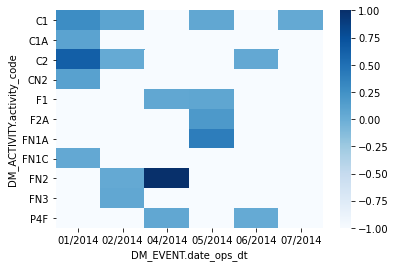

In [28]:
import numpy as np; np.random.seed(0)
import seaborn as sns

loss_cir_m = df_viz_q3_clean.pivot('DM_ACTIVITY.activity_code', "DM_EVENT.date_ops_dt", "LOSS_CIRCULATION_norm")
sns.heatmap(loss_cir_m, cmap="Blues")


In [38]:
t3_loss_cir_occ = df_prep.groupby('DM_ACTIVITY.activity_code')['LOSS_CIRCULATION'].count()\
                                                    .sort_values(ascending=False).reset_index()[:3]

<ipython-input-39-b1bc02f5a1d2>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x,y, color='rgb')


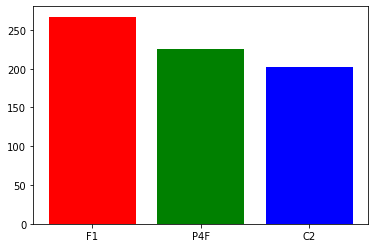

In [39]:
import numpy as np
import matplotlib.pyplot as plt
x = t3_loss_cir_occ['DM_ACTIVITY.activity_code'].values
y = t3_loss_cir_occ['LOSS_CIRCULATION'].values
plt.bar(x,y, color='rgb')
plt.show()

In [29]:
df_prep[df_prep['LOSS_CIRCULATION']>0].groupby(['DM_ACTIVITY.activity_code'])\
                                        ['LOSS_CIRCULATION'].sum()\
                                        .sort_values(ascending=False)[:10]


DM_ACTIVITY.activity_code
FN2     460.60
C2      324.04
C1      214.26
FN1A    178.73
F2A      90.49
F1       57.37
P4F      50.77
CN2      50.00
C1A      43.50
FN3      25.00
Name: LOSS_CIRCULATION, dtype: float64

In [30]:
## count the number of DM_ACTIVITY.activity_code with record (in DM_ACTIVITY.activity_memo)

df_viz_cnt = df_prep[df_prep['LOSS_CIRCULATION']>=0].groupby(['DM_ACTIVITY.activity_code'])['LOSS_CIRCULATION']\
                                                    .count().reset_index()
df_viz_cnt = df_viz_cnt.rename(columns={'LOSS_CIRCULATION':'LOSS_CIRCULATION_cnt_chk'})
df_viz_cnt

,DM_ACTIVITY.activity_code,LOSS_CIRCULATION_cnt_chk
0,B2,50
1,BN2,55
2,BN4,1
3,BN7,1
4,C1,157
5,C1A,17
6,C2,202
7,C3,47
8,C4,3
9,CN1,3


In [31]:
## count the number of DM_ACTIVITY.activity_code occurring (in DM_ACTIVITY.activity_memo)

df_viz_cnt2 = df_prep[df_prep['LOSS_CIRCULATION']>0].groupby(['DM_ACTIVITY.activity_code'])['LOSS_CIRCULATION'].count().reset_index()
df_viz_cnt2 = df_viz_cnt2.rename(columns={'LOSS_CIRCULATION':'LOSS_CIRCULATION_cnt_occur'})
df_viz_cnt2

,DM_ACTIVITY.activity_code,LOSS_CIRCULATION_cnt_occur
0,C1,36
1,C1A,4
2,C2,18
3,C3,5
4,CN2,3
5,CN7,1
6,F1,8
7,F10,1
8,F2A,15
9,F2B,1


In [32]:
df_viz_cnt_all = df_viz_cnt.merge(df_viz_cnt2, how='inner', on='DM_ACTIVITY.activity_code')\
                            .sort_values('DM_ACTIVITY.activity_code', ascending=True).reset_index()
df_viz_cnt_all

,index,DM_ACTIVITY.activity_code,LOSS_CIRCULATION_cnt_chk,LOSS_CIRCULATION_cnt_occur
0,0,C1,157,36
1,1,C1A,17,4
2,2,C2,202,18
3,3,C3,47,5
4,4,CN2,3,3
5,5,CN7,2,1
6,6,F1,267,8
7,7,F10,3,1
8,8,F2A,43,15
9,9,F2B,20,1


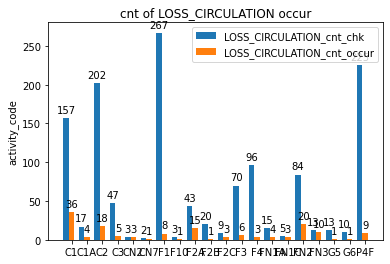

<Figure size 3600x2160 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
import numpy as np


labels = df_viz_cnt_all['DM_ACTIVITY.activity_code'].values
y1 = df_viz_cnt_all['LOSS_CIRCULATION_cnt_chk'].values
y2 = df_viz_cnt_all['LOSS_CIRCULATION_cnt_occur'].values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, y1, width=width, label='LOSS_CIRCULATION_cnt_chk')
rects2 = ax.bar(x, y2, width=width, label='LOSS_CIRCULATION_cnt_occur')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('activity_code')
ax.set_title('cnt of LOSS_CIRCULATION occur')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.figure(figsize=(50,30))
autolabel(rects1)
autolabel(rects2)

plt.show()

In [34]:
## Calculate percentage to occur for each DM_ACTIVITY.activity_code

df_viz_cnt_all['percentage_to_occur'] = (df_viz_cnt_all['LOSS_CIRCULATION_cnt_occur']/df_viz_cnt_all['LOSS_CIRCULATION_cnt_chk'])*100
df_viz_cnt_all = df_viz_cnt_all.sort_values('percentage_to_occur', ascending=False)
df_viz_cnt_all


,index,DM_ACTIVITY.activity_code,LOSS_CIRCULATION_cnt_chk,LOSS_CIRCULATION_cnt_occur,percentage_to_occur
4,4,CN2,3,3,100.000000
16,16,FN3,13,10,76.923077
14,14,FN1C,5,3,60.000000
5,5,CN7,2,1,50.000000
8,8,F2A,43,15,34.883721
10,10,F2C,9,3,33.333333
7,7,F10,3,1,33.333333
13,13,FN1A,15,4,26.666667
15,15,FN2,84,20,23.809524
1,1,C1A,17,4,23.529412


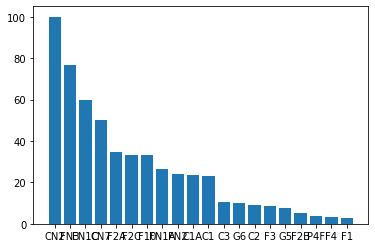

In [35]:
x = df_viz_cnt_all['DM_ACTIVITY.activity_code'].values.tolist()
y = df_viz_cnt_all['percentage_to_occur'].values.tolist()

plt.bar(x,y)
plt.show()

In [36]:
sum_loss = df_prep.groupby('DM_ACTIVITY.activity_code')['LOSS_CIRCULATION'].agg(sum_loss_cir='sum')
sum_loss = sum_loss[sum_loss['sum_loss_cir']>0].sort_values('sum_loss_cir', ascending=False).reset_index()[:10]

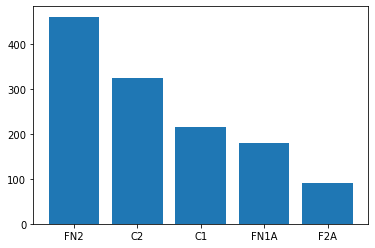

In [37]:
import numpy as np
import matplotlib.pyplot as plt
x = sum_loss['DM_ACTIVITY.activity_code'].values[:5]
y = sum_loss['sum_loss_cir'].values[:5]
plt.bar(x,y)
plt.show()